In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from pandas.api.types import CategoricalDtype

In [2]:
#file paths
path_name = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\name.basics.tsv\data.tsv"
path_akas = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.akas.tsv\data.tsv"
path_basics = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.basics.tsv\data.tsv"
path_principals = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.principals.tsv\data.tsv"
path_ratings = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.ratings.tsv\data.tsv"

In [3]:
#read files
df_name = pd.read_csv(path_name, sep = '\t', header = 0)
df_akas = pd.read_csv(path_akas, sep = '\t', header = 0, dtype = {'isOriginalTitle' : str})
df_basics = pd.read_csv(path_basics, sep = '\t', header = 0, dtype = {'isAdult' : str})
df_principals = pd.read_csv(path_principals, sep = '\t', header = 0)
df_ratings = pd.read_csv(path_ratings, sep = '\t', header = 0)

## Understanding Dataset

In [4]:
df_basics['genres'].value_counts()

genres
Drama                          1172611
Comedy                          696487
Talk-Show                       637307
Drama,Romance                   491012
News                            489604
                                ...   
Comedy,History,Thriller              1
Crime,Sci-Fi,War                     1
Adult,Sport,War                      1
Crime,Musical,War                    1
Adventure,Biography,Musical          1
Name: count, Length: 2352, dtype: int64

In [6]:
display('df_name' , df_name.head(5), df_name.shape) 
display('df_akas' , df_akas.head(5), df_akas.shape)
display('df_basics' , df_basics.head(5), df_basics.shape)
display('df_principals' , df_principals.head(25), df_principals.shape)
display('df_ratings' , df_ratings.head(5), df_ratings.shape)

'df_name'

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0069467,tt0083922"


(12936747, 6)

'df_akas'

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


(37517220, 8)

'df_basics'

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


(10246265, 9)

'df_principals'

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
5,tt0000003,1,nm0721526,director,\N,\N
6,tt0000003,2,nm1770680,producer,producer,\N
7,tt0000003,3,nm1335271,composer,\N,\N
8,tt0000003,4,nm5442200,editor,\N,\N
9,tt0000004,1,nm0721526,director,\N,\N


(58672906, 6)

'df_ratings'

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1893
3,tt0000004,5.5,178
4,tt0000005,6.2,2678


(1360168, 3)

In [7]:
# summary statistics
display('df_name' , df_name.describe())
display('df_akas' , df_akas.describe())
display('df_basics' , df_basics.describe())
display('df_principals' , df_principals.describe())
display('df_ratings' , df_ratings.describe())

'df_name'

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,12936747,12936741,12936747,12936747,10372543,12936747
unique,12936747,10003325,527,469,21576,5515905
top,nm0000001,Alex,\N,\N,actor,\N
freq,1,437,12342685,12715533,2337734,1408314


'df_akas'

,ordering
count,3.751722e+07
mean,4.163514e+00
std,3.982560e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,6.000000e+00
max,2.490000e+02


'df_basics'

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,10246265,10246265,10246248,10246248,10246265,10246265,10246265,10246265,10246247
unique,10246265,11,4609771,4632405,12,153,96,901,2352
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,7812135,49461,49461,9922998,1369767,10132437,7156284,1172611


'df_principals'

,ordering
count,5.867291e+07
mean,4.612958e+00
std,2.787001e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


'df_ratings'

,averageRating,numVotes
count,1.360168e+06,1.360168e+06
mean,6.958163e+00,1.039067e+03
std,1.382250e+00,1.757916e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.200000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.809141e+06


In [8]:
# info
display('df_name' , df_name.info())
display('df_akas' , df_akas.info())
display('df_basics' , df_basics.info())
display('df_principals' , df_principals.info())
display('df_ratings' , df_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936747 entries, 0 to 12936746
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 592.2+ MB


'df_name'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517220 entries, 0 to 37517219
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.2+ GB


'df_akas'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10246265 entries, 0 to 10246264
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 703.6+ MB


'df_basics'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58672906 entries, 0 to 58672905
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 2.6+ GB


'df_principals'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360168 entries, 0 to 1360167
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1360168 non-null  object 
 1   averageRating  1360168 non-null  float64
 2   numVotes       1360168 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.1+ MB


'df_ratings'

None

In [9]:
# checking NA
display(df_name.isna().sum())
display(df_akas.isna().sum())
display(df_basics.isna().sum())
display(df_principals.isna().sum())
display(df_ratings.isna().sum())


nconst                     0
primaryName                6
birthYear                  0
deathYear                  0
primaryProfession    2564204
knownForTitles             0
dtype: int64

titleId              0
ordering             0
title               18
region             117
language             0
types                0
attributes           0
isOriginalTitle      0
dtype: int64

tconst             0
titleType          0
primaryTitle      17
originalTitle     17
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            18
dtype: int64

tconst        0
ordering      0
nconst        0
category      0
job           0
characters    0
dtype: int64

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [12]:
df_name.isna().mean()

nconst               0.000000e+00
primaryName          4.637951e-07
birthYear            0.000000e+00
deathYear            0.000000e+00
primaryProfession    1.982109e-01
knownForTitles       0.000000e+00
dtype: float64

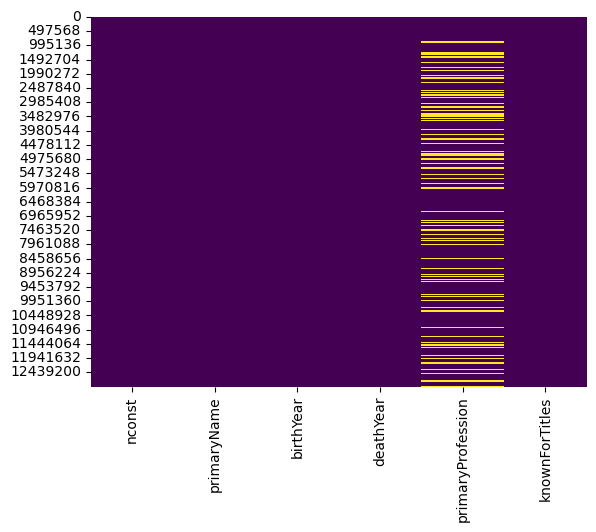

In [13]:
import seaborn as sns
sns.heatmap(df_name.isnull(), cbar=False, cmap='viridis')
plt.show()

In [14]:
df_name_w = df_name.drop_duplicates()
df_akas_w = df_akas.drop_duplicates()
df_basics_w = df_basics.drop_duplicates()
df_principals_w = df_principals.drop_duplicates()
df_ratings_w = df_ratings.drop_duplicates()

In [15]:
#print 5 rows of the dfs
display('df_name' , df_name_w.shape) 
display('df_akas' , df_akas_w.shape)
display('df_basics' ,  df_basics_w.shape)
display('df_principals' ,  df_principals_w.shape)
display('df_ratings' , df_ratings_w.shape)

'df_name'

(12936747, 6)

'df_akas'

(37517220, 8)

'df_basics'

(10246265, 9)

'df_principals'

(58672906, 6)

'df_ratings'

(1360168, 3)

In [16]:
# No duplicates found
display('df_name' , (df_name.shape[0] - df_name_w.shape[0]))
display('df_akas' , (df_akas.shape[0] - df_akas_w.shape[0]))
display('df_basics' ,  (df_basics.shape[0] - df_basics_w.shape[0]))
display('df_principals' ,  (df_principals.shape[0] - df_principals_w.shape[0]))
display('df_ratings' , (df_ratings.shape[0] - df_ratings_w.shape[0]))

'df_name'

0

'df_akas'

0

'df_basics'

0

'df_principals'

0

'df_ratings'

0

In [17]:
# Drop rows with missing values
df_name_w.dropna(inplace=True)
df_akas_w.dropna(inplace=True)
df_basics_w.dropna(inplace=True)


In [18]:
display('df_name' , df_name_w.shape) 
display('df_akas' , df_akas_w.shape)
display('df_basics' ,  df_basics_w.shape)

'df_name'

(10372538, 6)

'df_akas'

(37517085, 8)

'df_basics'

(10246230, 9)

#### Finding out how many films per language is there

In [20]:
language_counts = df_akas_w['language'].value_counts()
total_films = len(df_akas_w)

language_percentage = (language_counts / total_films) * 100

language_df = pd.DataFrame({'language': language_counts.index, 'count': language_counts.values, 'percentage': language_percentage.values})

language_df.head(12)

,language,count,percentage
0,\N,6777957,18.066321
1,ja,4362281,11.627452
2,fr,4332520,11.548125
3,hi,4298930,11.458593
4,es,4266392,11.371864
5,de,4265971,11.370742
6,it,4264310,11.366315
7,pt,4264162,11.365920
8,en,489000,1.303406
9,tr,36398,0.097017


In [21]:
language_counts

language
\N     6777957
ja     4362281
fr     4332520
hi     4298930
es     4266392
        ...   
roa          1
rn           1
sq           1
eka          1
cr           1
Name: count, Length: 108, dtype: int64

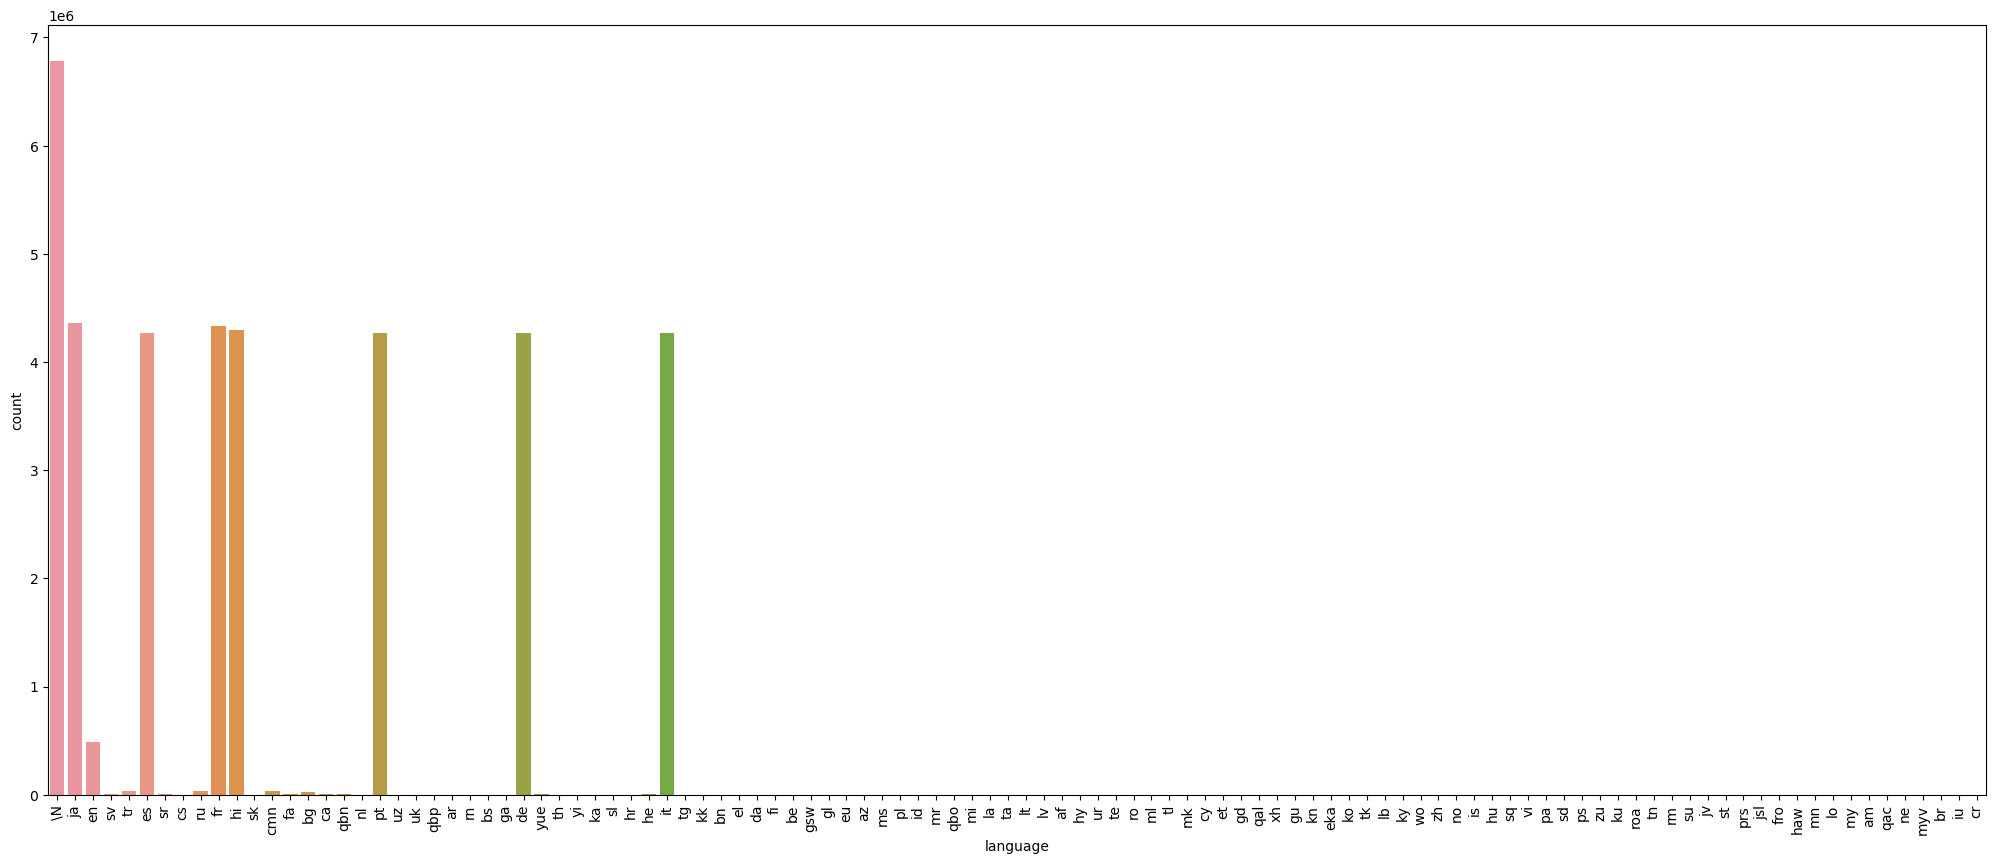

In [22]:
plt.figure(figsize=(25, 10))
sns.countplot(x='language', data=df_akas_w)
plt.xticks(rotation=90)
plt.show()

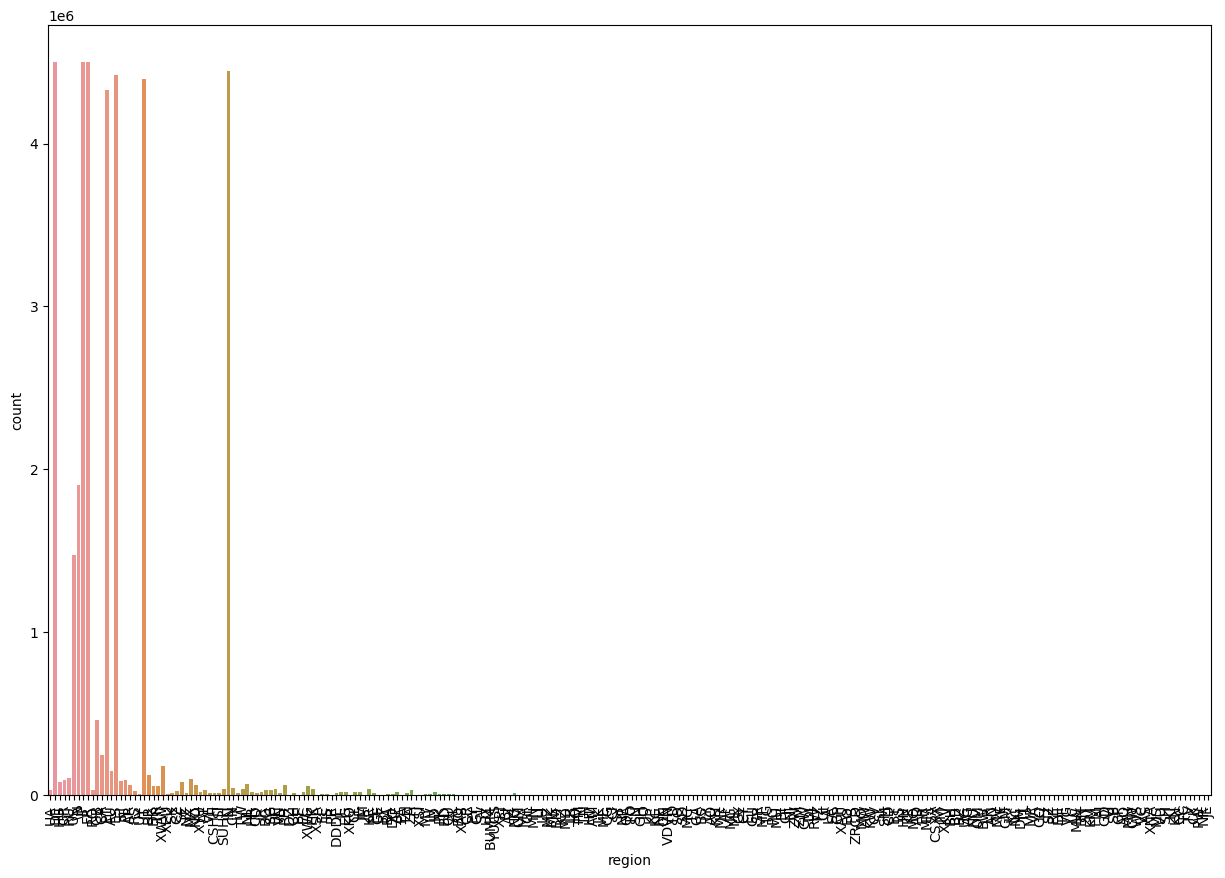

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(x='region', data=df_akas_w)
plt.xticks(rotation=90)
plt.show()

In [25]:
region_counts = df_akas_w['region'].value_counts()
total_films = len(df_akas_w)

region_percentage = (region_counts / total_films) * 100

region_df = pd.DataFrame({'region': region_counts.index, 'count': region_counts.values, 'percentage': region_percentage.values})

region_df.head(12)

,region,count,percentage
0,DE,4503724,12.004461
1,FR,4502500,12.001199
2,JP,4500967,11.997113
3,IN,4445483,11.849223
4,ES,4418828,11.778175
5,IT,4398798,11.724786
6,PT,4326161,11.531176
7,\N,1905000,5.077687
8,US,1472161,3.923975
9,GB,460927,1.228579


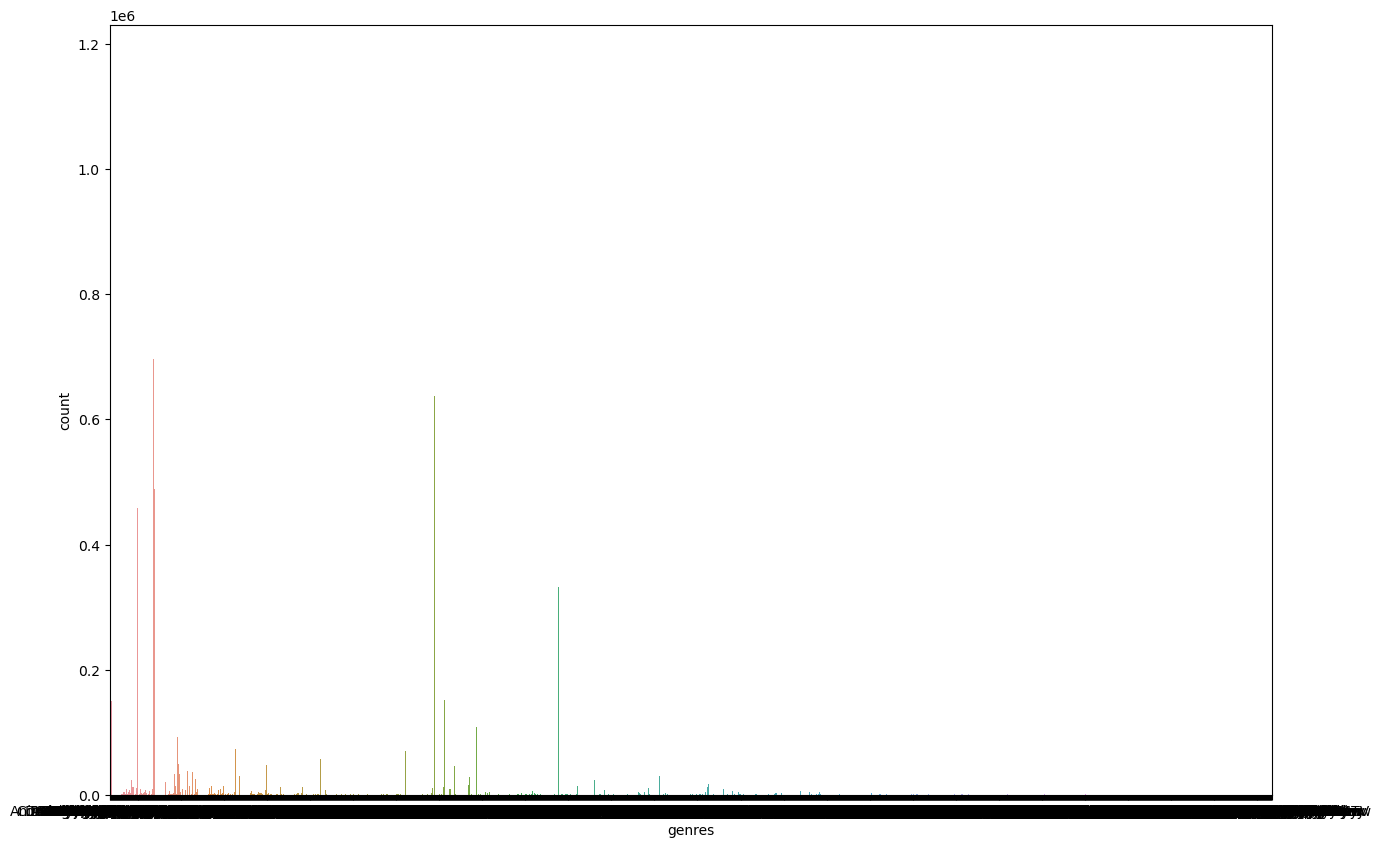

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(x='genres', data=df_basics_w)
plt.show()

In [27]:
genres_counts = df_basics_w['genres'].value_counts()
total_films = len(df_basics_w)

genres_percentage = (genres_counts / total_films) * 100

genres_df = pd.DataFrame({'genre': genres_counts.index, 'count': genres_counts.values, 'percentage': genres_percentage.values})

genres_df.head(15)

,genre,count,percentage
0,Drama,1172610,11.444307
1,Comedy,696487,6.797495
2,Talk-Show,637305,6.219897
3,"Drama,Romance",491012,4.792124
4,News,489604,4.778382
5,Documentary,489313,4.775542
6,\N,458530,4.475109
7,Reality-TV,331586,3.236176
8,Adult,284822,2.779774
9,"News,Talk-Show",224529,2.191333


# Mini Batch K-mean for testing wihtout any data transformation - trial

In [ ]:
df_basics_w

In [ ]:
df_basics_w.info()

In [ ]:
df_basics_w['runtimeMinutes'] = df_basics_w['runtimeMinutes'].apply(pd.to_numeric, errors='coerce')


In [ ]:
date_columns = ['startYear', 'endYear']

df_basics_w[date_columns] = df_basics_w[date_columns].apply(pd.to_datetime, errors='coerce')
df_basics_w['isAdult'] = df_basics_w['isAdult'].astype(bool)

In [ ]:
columns_to_drop = ['primaryTitle', 'originalTitle']

df_basics_w2 = df_basics_w.drop(columns=columns_to_drop)

In [ ]:
df_basics_w2.shape

In [ ]:
# on hot encoding
# memory error since it will create a df in 2352,10246230 shape
df_basics_encoded = pd.get_dummies(df_basics_w2, columns=['titleType', 'genres'])


In [ ]:
df_basics_encoded = pd.get_dummies(df_basics_w2, columns=['titleType', 'genres'], sparse = True)

In [ ]:
df_basics_encoded.head(2)

In [ ]:
df_basics_encoded.info()

In [ ]:
# error - can't change from datetime64 to int 32
df_basics_encoded['startYear'] = pd.to_datetime(df_basics_encoded['startYear']).astype(int)
df_basics_encoded['endYear'] = pd.to_datetime(df_basics_enconded['endYear']).astype(int)

In [ ]:
df_basics_encoded['startYear'] = pd.to_datetime(df_basics_encoded['startYear']).astype(np.int64)
df_basics_encoded['endYear'] = pd.to_datetime(df_basics_encoded['endYear']).astype(np.int64)

df_basics_encoded['startYear'] = df_basics_encoded['startYear'].astype(np.int32)
df_basics_encoded['endYear'] = df_basics_encoded['endYear'].astype(np.int32)


In [ ]:
df_basics_encoded.info()

In [ ]:
df_basics_encoded.set_index('tconst', inplace=True)


In [ ]:
df_basics_encoded

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_basics_encoded)

In [ ]:
df_basics_encoded

In [ ]:
df_new = df_basics_encoded.head(100000)

In [ ]:
df_new.isna().sum()

In [ ]:
df_new.dropna(inplace = True)

In [ ]:
df_new.isna().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=42)


In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=20, random_state=42, verbose = 1)
clusters_train = minibatch_kmeans.fit_predict(df_scaled)


In [ ]:
df_new = df_new.copy()
df_new['cluster'] = clusters_train


In [ ]:
df_new['cluster']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
from scipy.stats import zscore

z_scores = zscore(df)
df_no_outliers = df[(z_scores < 3).all(axis=1)]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


# Clustering

In [ ]:
#file paths
path_name = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\name.basics.tsv\data.tsv"
path_akas = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.akas.tsv\data.tsv"
path_basics = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.basics.tsv\data.tsv"
path_principals = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.principals.tsv\data.tsv"
path_ratings = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.ratings.tsv\data.tsv"

In [ ]:
#read files
df_name = pd.read_csv(path_name, sep = '\t', header = 0)
df_akas = pd.read_csv(path_akas, sep = '\t', header = 0, dtype = {'isOriginalTitle' : str})
df_basics = pd.read_csv(path_basics, sep = '\t', header = 0, dtype = {'isAdult' : str})
df_principals = pd.read_csv(path_principals, sep = '\t', header = 0)
df_ratings = pd.read_csv(path_ratings, sep = '\t', header = 0)

In [ ]:
df_name.dropna(inplace=True)
df_akas.dropna(inplace=True)
df_basics.dropna(inplace=True)

In [ ]:
df_name

In [ ]:
df_akas

In [ ]:
df_akas = df_akas.groupby('titleId')['title'].count().reset_index(name='translations')


In [ ]:
df_akas

In [ ]:
df_basics

In [ ]:
df_basics.drop('originalTitle', axis = 1 , inplace = True)

In [ ]:
df_principals

In [ ]:
df_principals = df_principals.groupby('tconst')['nconst'].count().reset_index(name='cast_count')

In [ ]:
df_principals

In [ ]:
df_ratings

In [ ]:
df = pd.merge(df_basics, df_akas, left_on='tconst', right_on='titleId', how = 'left')

In [ ]:
df = pd.merge(df, df_principals, on='tconst', how='left')

In [ ]:
df = pd.merge(df, df_ratings, on='tconst', how='left')

In [ ]:
df

In [ ]:
df.drop(['titleId'], axis=1, inplace = True)

In [ ]:
df.set_index('tconst', inplace = True)

In [ ]:
df

In [ ]:
df['runtimeMinutes'] = df['runtimeMinutes'].apply(pd.to_numeric, errors='coerce')


In [ ]:
df['isAdult'] = df['isAdult'].apply(pd.to_numeric, errors='coerce')


In [ ]:
df['startYear'] = df['startYear'].apply(pd.to_numeric, errors='coerce')


In [ ]:
df['endYear'] = df['endYear'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

In [ ]:
df = pd.get_dummies(df, columns=['titleType'], prefix='titleType')

In [ ]:
df.info()

In [ ]:
df['genres_list'] = df['genres'].str.split(',')

max_genres = df['genres_list'].apply(len).max()
for i in range(max_genres):
    df[f'genre_{i+1}'] = df['genres_list'].apply(lambda x: x[i] if len(x) > i else None)
df.drop(columns=['genres_list', 'genres'], inplace=True)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
genre_df = df[['genre_1','genre_2', 'genre_3']]
stack_genre = genre_df.stack()
encoded_genre = pd.get_dummies(stack_genre, prefix='genre').groupby(level=0).sum()

In [ ]:
df = pd.concat([df,encoded_genre], axis=1)

In [ ]:
df.drop(['genre_1','genre_2', 'genre_3', 'genre_\\N'],axis =1, inplace = True)

In [ ]:
df.info()

In [ ]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
df.info()

In [ ]:
int64_cols = df.select_dtypes(include='int64').columns
df[int64_cols] = df[int64_cols].astype('int32')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

In [ ]:
df.to_csv('final_clustering', header=True, index=True) 

In [31]:
df_clustering = pd.read_csv(r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\final_clustering")

In [32]:
df_clustering.set_index('primaryTitle', inplace = True)

In [4]:
df_clustering.isna().sum()

tconst                          0
isAdult                         0
startYear                  848965
endYear                   8667474
runtimeMinutes            5744468
translations              2844451
cast_count                 788837
averageRating             7421143
numVotes                  7421143
titleType_movie                 0
titleType_short                 0
titleType_tvEpisode             0
titleType_tvMiniSeries          0
titleType_tvMovie               0
titleType_tvPilot               0
titleType_tvSeries              0
titleType_tvShort               0
titleType_tvSpecial             0
titleType_video                 0
titleType_videoGame             0
genre_Action                    0
genre_Adult                     0
genre_Adventure                 0
genre_Animation                 0
genre_Biography                 0
genre_Comedy                    0
genre_Crime                     0
genre_Documentary               0
genre_Drama                     0
genre_Family  

In [45]:
df_clustering = df_clustering.fillna(0)

In [46]:
df_clustering.isna().sum()

tconst                    0
isAdult                   0
startYear                 0
endYear                   0
runtimeMinutes            0
translations              0
cast_count                0
averageRating             0
numVotes                  0
titleType_movie           0
titleType_short           0
titleType_tvEpisode       0
titleType_tvMiniSeries    0
titleType_tvMovie         0
titleType_tvPilot         0
titleType_tvSeries        0
titleType_tvShort         0
titleType_tvSpecial       0
titleType_video           0
titleType_videoGame       0
genre_Action              0
genre_Adult               0
genre_Adventure           0
genre_Animation           0
genre_Biography           0
genre_Comedy              0
genre_Crime               0
genre_Documentary         0
genre_Drama               0
genre_Family              0
genre_Fantasy             0
genre_Film-Noir           0
genre_Game-Show           0
genre_History             0
genre_Horror              0
genre_Music         

In [47]:
df_after2000 = df_clustering['startYear']>2000

In [48]:
df = df_clustering[df_after2000]

In [49]:
df.drop('tconst', axis = 1, inplace = True)

C:\Users\sarav\AppData\Local\Temp\ipykernel_3220\248261665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('tconst', axis = 1, inplace = True)


In [50]:
df1 = df.copy()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)


In [52]:
scaled_features.shape

(5934102, 47)

In [53]:
scaled_features

array([[-0.22588513,  0.78456216, -0.11653249, ..., -0.14264325,
        -0.0553587 , -0.03160896],
       [-0.22588513,  1.12789365, -0.11653249, ..., -0.14264325,
        -0.0553587 , -0.03160896],
       [-0.22588513, -2.30542119, -0.11653249, ..., -0.14264325,
        -0.0553587 , -0.03160896],
       ...,
       [-0.22588513, -0.76042951, -0.11653249, ..., -0.14264325,
        -0.0553587 , -0.03160896],
       [-0.22588513,  0.0978992 , -0.11653249, ..., -0.14264325,
        -0.0553587 , -0.03160896],
       [-0.22588513, -0.07376654, -0.11653249, ..., -0.14264325,
        -0.0553587 , -0.03160896]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(scaled_features)

In [16]:
df1

,isAdult,startYear,endYear,runtimeMinutes,translations,cast_count,averageRating,numVotes,titleType_movie,titleType_short,...,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
primaryTitle,,,,,,,,,,,,,,,,,,,,,
Tötet nicht mehr,0,2019.0,0.0,0.0,3.0,10.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
Istoriya grazhdanskoy voyny,0,2021.0,0.0,94.0,7.0,3.0,6.8,58.0,1,0,...,0,0,0,0,0,0,0,0,0,0
Youth Gets a Break,0,2001.0,0.0,20.0,3.0,2.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
Kate & Leopold,0,2001.0,0.0,118.0,45.0,10.0,6.4,87747.0,1,0,...,0,0,1,0,0,0,0,0,0,0
Final Curtain,0,2012.0,0.0,20.0,3.0,5.0,4.6,216.0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Episode #3.17,0,2009.0,0.0,0.0,7.0,10.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
Episode #3.19,0,2010.0,0.0,0.0,7.0,10.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
Episode #3.20,0,2010.0,0.0,0.0,7.0,10.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_h = df1.sample(frac=0.001, random_state=3)

In [18]:
scaled_features1 = scaler.fit_transform(df_h)
pca1 = PCA(n_components=0.95)
df_h_pca = pca1.fit_transform(scaled_features1)

In [19]:
df_h_pca.shape

(5934, 38)

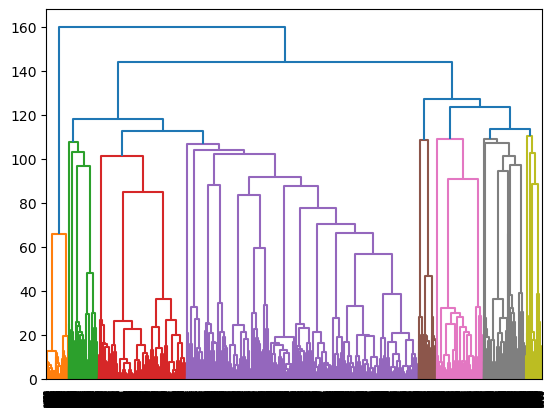

<Figure size 1200x800 with 0 Axes>

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import time

start_time = time.time()
linkage_matrix = linkage(df_h_pca, method='ward')

# dendrogram
dendrogram(linkage_matrix)
plt.figure(figsize=(12, 8))
plt.show()


threshold = 60 


df_h['hierarchical_cluster'] = fcluster(linkage_matrix, t=threshold, criterion='distance')


end_time = time.time()
total_time = end_time - start_time


In [24]:
total_time

200.65574526786804

In [33]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None) 

In [43]:
df_h[df_h['hierarchical_cluster'] == 18]


,isAdult,startYear,endYear,runtimeMinutes,translations,cast_count,averageRating,numVotes,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvPilot,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,hierarchical_cluster
primaryTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gran germà,0,2017.0,0.0,0.0,0.0,10.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
American Embassy Bombing,0,2006.0,0.0,47.0,0.0,10.0,6.5,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
Swanwick to Brownsea Island,0,2018.0,0.0,29.0,1.0,4.0,8.3,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
Welcome to the Jungle: Adventures in Bolivia PT.1,0,2015.0,0.0,22.0,0.0,5.0,8.1,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
Program 6,0,2014.0,0.0,0.0,0.0,4.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Addicted to Protein,0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
How to Make Beef Stew,0,2018.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
The Genesis of Terrorism,0,2023.0,0.0,0.0,0.0,2.0,10.0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18


In [38]:
df.head(2)

,isAdult,startYear,endYear,runtimeMinutes,translations,cast_count,averageRating,numVotes,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvPilot,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,kmeans_cluster_40,kmeans_cluster_50
primaryTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tötet nicht mehr,0,2019.0,0.0,0.0,3.0,10.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0
Istoriya grazhdanskoy voyny,0,2021.0,0.0,94.0,7.0,3.0,6.8,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6


In [42]:
df[df['kmeans_cluster_40'] == 10]

,isAdult,startYear,endYear,runtimeMinutes,translations,cast_count,averageRating,numVotes,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvPilot,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,kmeans_cluster_40,kmeans_cluster_50
primaryTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mit doppeltem Boden,0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,33
Das Schlosshotel,0,2001.0,0.0,89.0,1.0,10.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,11
Le vigneron français,0,2001.0,0.0,0.0,1.0,2.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,33
Das Verlegenheitskind,0,2001.0,0.0,90.0,1.0,10.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,11
A sauberne Welt,0,2001.0,0.0,90.0,2.0,10.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hack/Mine Update! - Mothers Day Dungeon,0,2012.0,0.0,13.0,0.0,5.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,11
L'échange,0,2007.0,0.0,0.0,0.0,7.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,33
Hack/Mine Update! - The Easter Tower,0,2012.0,0.0,15.0,0.0,5.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,11


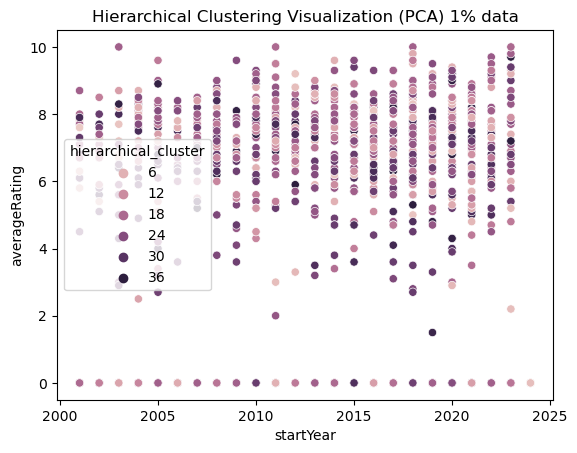

In [26]:
sns.scatterplot(x='startYear', y='averageRating', hue='hierarchical_cluster', data=df_h)
plt.title('Hierarchical Clustering Visualization (PCA) 1% data')
plt.show()

In [ ]:
import time
from sklearn.cluster import KMeans

start_time = time.time()
X = df_pca

k_values = [10,20,30,40,50,60,70,80,90,100]


sse_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_assignments = kmeans.fit_predict(X)
    
    df[f'kmeans_cluster_{k}'] = cluster_assignments

    sse = kmeans.inertia_
    sse_values.append(sse)

# Display the DataFrame with cluster assignments
print(df.head())

# Plot the SSE values to determine the "elbow" point
end_time = time.time()
total_time = end_time - start_time
print(total_time)

plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [25]:
df

Index(['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'translations',
       'cast_count', 'averageRating', 'numVotes', 'titleType_movie',
       'titleType_short', 'titleType_tvEpisode', 'titleType_tvMiniSeries',
       'titleType_tvMovie', 'titleType_tvPilot', 'titleType_tvSeries',
       'titleType_tvShort', 'titleType_tvSpecial', 'titleType_video',
       'titleType_videoGame', 'genre_Action', 'genre_Adult', 'genre_Adventure',
       'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
       'genre_Film-Noir', 'genre_Game-Show', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_News',
       'genre_Reality-TV', 'genre_Romance', 'genre_Sci-Fi', 'genre_Short',
       'genre_Sport', 'genre_Talk-Show', 'genre_Thriller', 'genre_War',
       'genre_Western', 'kmeans_cluster_5', 'kmeans_cluster_10',
       'kmeans_cluster_15', 'kmeans_cluster_20'

In [ ]:
from sklearn.cluster import SpectralClustering
start_time2 = time.time()

k_spectral = 3

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=k_spectral, random_state=42)
spectral_cluster_assignments = spectral.fit_predict(df_h_pca)

# Calculate silhouette score for spectral clustering
silhouette_avg_spectral = silhouette_score(df_h_pca, spectral_cluster_assignments)
print(f"Silhouette Score for Spectral Clustering with {k_spectral} clusters: {silhouette_avg_spectral}")
end_time3 = time.time()
tot_time = end_time3 - start_time2

In [ ]:
df_h['spectral_clustering'] = spectral_cluster_assignments

In [ ]:
sns.scatterplot(x='startYear', y='averageRating', hue='hierarchical_cluster', data=df_h)
plt.title('Hierarchical Clustering Visualization (PCA) 1% data')
plt.show()

In [35]:
df2 = df.sample(frac=0.0001, random_state=3) 

In [42]:
df2 = df2.set_index('primaryTitle')

In [43]:
df2

,isAdult,startYear,endYear,runtimeMinutes,translations,cast_count,averageRating,numVotes,titleType_movie,titleType_short,...,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,kmeans_cluster_40,kmeans_cluster_50
primaryTitle,,,,,,,,,,,,,,,,,,,,,
Angharad Rees,0,2013.0,0.0,0.0,0.0,9.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,31,11
Gran germà,0,2017.0,0.0,0.0,0.0,10.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,31
Episode #1.28,0,2004.0,0.0,60.0,7.0,1.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,34,41
Episode #2.14,0,2005.0,0.0,0.0,7.0,8.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,30,13
If You Are Happy and You Know It,0,2006.0,0.0,10.0,0.0,2.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Episode #14.59,0,2022.0,0.0,0.0,7.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,4,29
N°2628 Arnau Vilaró,0,2012.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,31
Episode #1.1030,0,2022.0,0.0,0.0,7.0,10.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,4


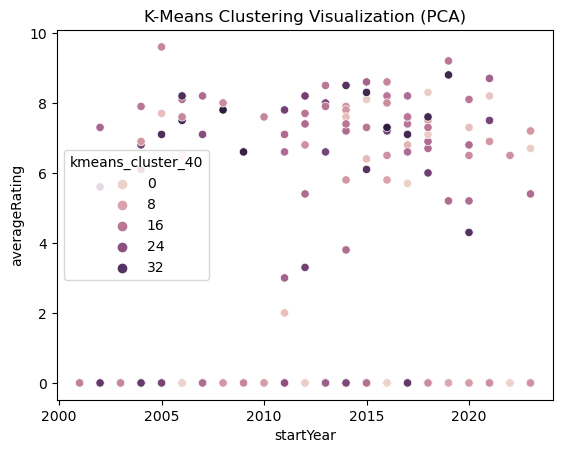

In [39]:
sns.scatterplot(x='startYear', y='averageRating', hue='kmeans_cluster_40', data=df2)
plt.title('K-Means Clustering Visualization (PCA)')
plt.show()